# Reproduce  A. M. Messinis, et. al, Nature Catalysis, 2019,  2,  123-133 

This notebook demonstrates reproducing the results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 



Antonis M. Messinis, Stephen L. J. Luckham, Peter P. Wells, Diego Gianolio, Emma K. Gibson, Harry M. O’Brien, Hazel A. Sparkes, Sean A. Davis, June Callison, David Elorriaga, Oscar Hernandez-Fajardo & Robin B. Bedford (2019) **The highly surprising behaviour of diphosphine ligands in iron-catalysed Negishi cross-coupling** Nature Catalysis, 2019,  2,  123-133 DOI: [10.1038/s41929-018-0197-z](https://doi.org/10.1038/s41929-018-0197-z).

The data used for reproducing the results was published in the University of Bristol Research Data Repository [10.5523/bris.1kp2f62x3klb02mfz2qymcmxmx](https://data.bris.ac.uk/data/dataset/1kp2f62x3klb02mfz2qymcmxmx).


For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing Results
[Figure 5](https://www.nature.com/articles/s41929-018-0197-z/figures/5) contains the first XAS results presented in the paper.

>Fig. 5 | Time-resolved XAFS spectroscopy studies. a, Formation of cross-coupled and homo-coupled products in the coupling of 1 and 2a at 22 °C. Time 
points A–D corresponding to the points when XAFS data were recorded using the flow reactor (A = 6 s, B = 166 s, C = 482 s, D = 817 s). The colours used for
time-point indicators A– D correspond to the colours of the spectra recorded at these time point shown in c–f; the colours used for the chemical structures
correspond to the colours of the plots in the graphs shown in a and b. b, Expansion of the first 30 s of the reaction, highlighting the catalytic ‘burst’ phase.
**c, Magnitude k2 Fourier transform data** of the Fe foil and the reaction of 1 + 2/MgBr2 catalysed by FeBr2(dpbz)2] (7a) at time points A–D. The shaded
areas are used to highlight the areas of scattering contribution from Fe–Fe (grey), Fe–C/O (orange) and Fe–Br (green).**d, Normalized XANES spectra** of
the Fe foil, FeBr2 and positions A–D. **e, Normalized XANES data** showing a close-up of the edge position of complex 7a (FeBr2(dpbz)2) and positions A–D. **f, Normalized
XANES derivative spectra** of the Fe foil, FeBr2 and positions A–D. The shaded areas are used to highlight the features associated with metallic Fe (grey) and
bromidic Fe (green).

All data is in the "XAS Data" folder of the zip file
For reproduction we assume that:
- A-D are in the "\XAS data\SI77 and Figure 5\Position A - \XAS data\SI77 and Figure 5\Position D" folders
- Fe starndard is in "\XAS data\SI70" folder
- FeBr is in is in "\XAS data\SI80" folder
- FeBr2dpbz  is in "\XAS data\SI81" folder

### Data Processing
Data needs merging (assuming all readings correspond to same time)

In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline

# define data location
data_path =  "C:/harwell/PSDI_test/wf_data/pub_047/XAS data"

# define mappings:
data_mappings={"Fe Metal": "SI70/*.dat",
               "A":        "SI77 and Figure 5/Position A/*.dat",
               "B":        "SI77 and Figure 5/Position B/*.dat",
               "C":        "SI77 and Figure 5/Position C/*.dat",
               "D":        "SI77 and Figure 5/Position D/*.dat",
               "FeBr":     "SI80/*.dat", 
               "7a":       "SI81/*.dat",}
# Output prefix
f_prefix = "FeBr_bpbz"

# Labels for data in .dat files
               #"0             1    2  3  4    5      6        7
               #"qexafs_energy time I0 It Iref lnI0It lnItIref Element_0 Element_1 Element_2 Element_3 Element_4	Element_5	Element_6	Element_7	Element_8	Element_9	Element_10	Element_11	Element_12	Element_13	Element_14	Element_15	Element_16	Element_17	Element_18	Element_19	Element_20	Element_21	Element_22	Element_23	Element_24	Element_25	Element_26	Element_27	Element_28	Element_29	Element_30	Element_31	Element_32	Element_33	Element_34	Element_35	  FF	 QexafsFFI0"
               #"0      1    2  3  4    5      6"
column_labels = "energy time I0 It Iref lnI0It mu Element0 Element1 Element2 Element3 Element4 Element5 Element6 Element7 Element8 FF QexafsFFI0"

show_graph = True # False to prevent showing graphs

In [2]:
# start processing createa an output dir and sets the logger
source_path, out_path = athenamgr.files_setup(f_prefix, data_path)

merged_results={}
# read all samples, merge and then normalise
for a_sample in data_mappings:
    files_list = athenamgr.get_files_list(source_path, data_mappings[a_sample])

    # read the files for each sample

    sample_list = []

    for i_count, a_file  in enumerate(files_list):
        file_name = a_file.name
        f_suffix = str(i_count).zfill(4) 
        p_name = f_prefix+f_suffix
        p_path = Path(out_path , p_name + ".prj")
        a_group = athenamgr.read_text(a_file, column_labels)
        sample_list.append(a_group)
        
    # merge readings for sample
    merged_xas = athenamgr.merge_readings(sample_list)

    # rename group (same as the file name)
    merged_xas.filename = a_sample
    merged_results[a_sample] = merged_xas
    
merged_groups = Path(out_path,"merge.prj")
# save merged results
athenamgr.save_groups([merged_results["Fe Metal"],merged_results["A"],
                          merged_results["B"],merged_results["C"],
                          merged_results["D"],merged_results["FeBr"],
                          merged_results["7a"]], merged_groups)

### Reproducing 5c: Magnitude k2 Fourier transform data

A-D indicate the time points at at wich Fe Foil XAS data was recorded and the black line corresponds to Fe Foil (Standard).
A-D are in the 

(7110.0, 7128.0)

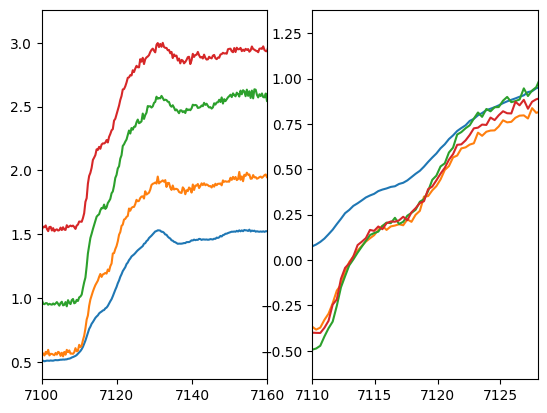

In [3]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# read the input file 
athena_prj = athenamgr.read_project(merged_groups)

athena_groups = athenamgr.get_groups(athena_prj)

fig = plt.figure()#figsize=(10, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
    
offset = 0.5
include_groups = ["A", "B", "C", "D"]
for g_indx ,a_group in enumerate(athena_groups):
    athenamgr.calc_with_defaults(a_group)
    if a_group.filename in include_groups:
        ax1.plot(a_group.energy, a_group.norm + (g_indx*offset) )
        
ax1.set_xlim([7100, 7160])

for g_indx ,a_group in enumerate(athena_groups):
    athenamgr.calc_with_defaults(a_group)
    if a_group.filename in include_groups:
        ax2.plot(a_group.energy, a_group.norm)
        
ax2.set_xlim([7110, 7128])

632 826


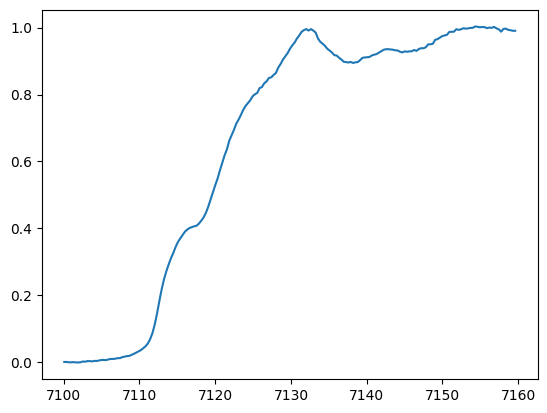

In [4]:
# crop data

import numpy as np
len(athena_groups[0].energy)

    

lower = np.abs(athena_groups[0].energy -7100).argmin()
upper = np.abs(athena_groups[0].energy -7160).argmin() 
print(lower,upper)
new_energy = athena_groups[0].energy[lower:upper]
new_norm = athena_groups[0].norm[lower:upper]
plt.plot(new_energy, new_norm)



(7100.0, 7160.0)

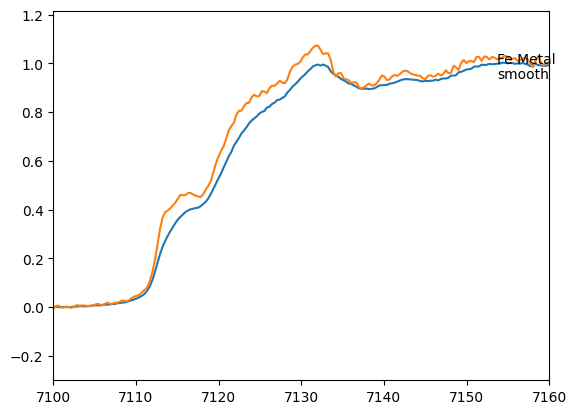

In [5]:
# smooth data for plotting
from larch.xafs import xas_deconvolve
athena_groups[0]
xas_deconvolve(athena_groups[0])

plt.plot(athena_groups[0].energy, athena_groups[0].norm, label=athena_groups[0].filename)
plt.text(athena_groups[0].energy[826-20]+.01, athena_groups[0].norm[826-20], str(athena_groups[0].filename))
plt.plot(athena_groups[0].energy, athena_groups[0].deconv, label='deconvolved')
plt.text(athena_groups[0].energy[826-20], athena_groups[0].norm[826-40], 'smooth')
plt.xlim([7100, 7160])

(7100.0, 7160.0)

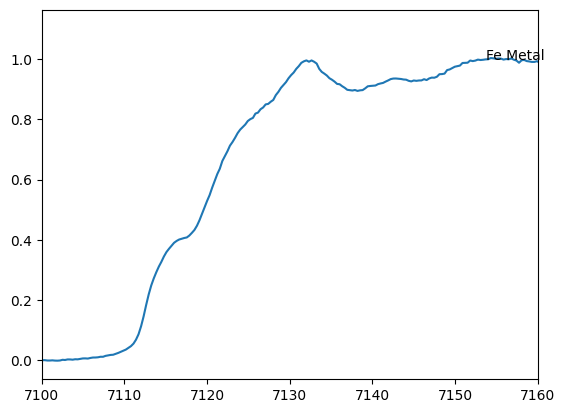

In [6]:
import matplotlib.pyplot as plt

plt.plot(athena_groups[0].energy, athena_groups[0].norm)
plt.text(athena_groups[0].energy[826-20], athena_groups[0].norm[826-20],  athena_groups[0].filename)
plt.xlim([7100, 7160])

### Reproducing 5d: Normalized XANES spectra

A-D indicate the time points at at wich Fe Foil XAS data was recorded, the black line corresponds to Fe Foil, and orange line at the bottom corresponds to FeBr<sub>2</sub>.

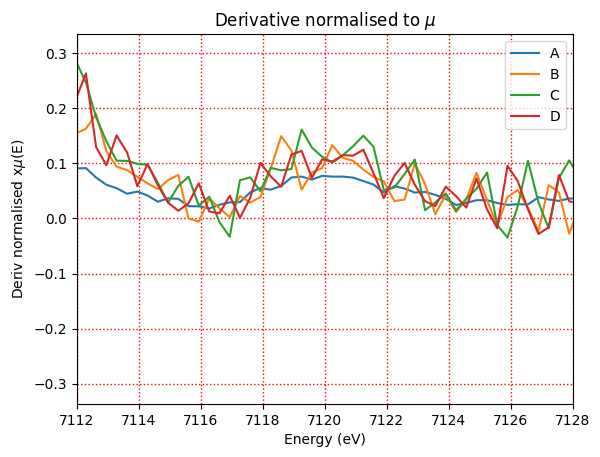

In [7]:
#plt.ylim([-10, 2])
plt.show()

for a_sample in merged_results:
    if merged_results[a_sample].filename in include_groups:
        plt = athenamgr.plot_derivative(merged_results[a_sample])
plt.xlim([7112,7128])
plt.show()

### Reproducing 5e: Normalized XANES spectra (close up)

A-D indicate the time points at at wich Fe Foil XAS data was recorded, cyan line at the bottom corresponds to complex 7a.

### Reproducing 5f: Normalized XANES derivative spectra

A-D indicate the time points at at wich Fe Foil XAS data was recorded, the black line corresponds to Fe Foil, and orange line at the bottom corresponds to FeBr<sub>2</sub>.

In [8]:
xas_data

NameError: name 'xas_data' is not defined

In [ ]:
merged_results["E"].norm